In [149]:
!pip install keras
!pip install tensorflow<2.11
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install scikit-learn
!pip install seaborn

The system cannot find the file specified.


In [150]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19, vgg16
from tensorflow.keras.layers import AveragePooling2D, Conv2D, MaxPooling2D, Dropout, Dense, Input, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import load_img, img_to_array
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


In [151]:
import keras
keras.__version__

'2.10.0'

In [152]:
import os
print(os.listdir("Fruit360/fruits-360_dataset/fruits-360/Training/"))


['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

In [153]:
fruits = ['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melon Piel de Sapo', 'Mulberry', 'Nectarine', 'Nectarine Flat', 'Nut Forest', 'Nut Pecan', 'Onion Red', 'Onion Red Peeled', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Peach 2', 'Peach Flat', 'Pear', 'Pear 2', 'Pear Abate', 'Pear Forelle', 'Pear Kaiser', 'Pear Monster', 'Pear Red', 'Pear Stone', 'Pear Williams', 'Pepino', 'Pepper Green', 'Pepper Orange', 'Pepper Red', 'Pepper Yellow', 'Physalis', 'Physalis with Husk', 'Pineapple', 'Pineapple Mini', 'Pitahaya Red', 'Plum', 'Plum 2', 'Plum 3', 'Pomegranate', 'Pomelo Sweetie', 'Potato Red', 'Potato Red Washed', 'Potato Sweet', 'Potato White', 'Quince', 'Rambutan', 'Raspberry', 'Redcurrant', 'Salak', 'Strawberry', 'Strawberry Wedge', 'Tamarillo', 'Tangelo', 'Tomato 1', 'Tomato 2', 'Tomato 3', 'Tomato 4', 'Tomato Cherry Red', 'Tomato Heart', 'Tomato Maroon', 'Tomato not Ripened', 'Tomato Yellow', 'Walnut', 'Watermelon']
fruits.sort()
print(fruits)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

In [154]:
print("Number of Fruits: ",len(fruits))

Number of Fruits:  131


In [155]:
cal_values = """Apple Braeburn:~52 calories per 100 grams
Apple Crimson Snow:~52 calories per 100 grams
Apple Golden 1:~52 calories per 100 grams
Apple Golden 2:~52 calories per 100 grams
Apple Golden 3:~52 calories per 100 grams
Apple Granny Smith:~52 calories per 100 grams
Apple Pink Lady:~52 calories per 100 grams
Apple Red 1:~52 calories per 100 grams
Apple Red 2:~52 calories per 100 grams
Apple Red 3:~52 calories per 100 grams
Apple Red Delicious:~52 calories per 100 grams
Apple Red Yellow 1:~52 calories per 100 grams
Apple Red Yellow 2:~52 calories per 100 grams
Apricot:~48 calories per 100 grams
Avocado:~160 calories per 100 grams
Avocado ripe:~160 calories per 100 grams
Banana:~89 calories per 100 grams
Banana Lady Finger:~89 calories per 100 grams
Banana Red:~89 calories per 100 grams
Beetroot:~43 calories per 100 grams
Blueberry:~57 calories per 100 grams
Cactus fruit:~50 calories per 100 grams
Cantaloupe 1:~34 calories per 100 grams
Cantaloupe 2:~34 calories per 100 grams
Carambula:~31 calories per 100 grams
Cauliflower:~25 calories per 100 grams
Cherry 1:~50 calories per 100 grams
Cherry 2:~50 calories per 100 grams
Cherry Rainier:~50 calories per 100 grams
Cherry Wax Black:~50 calories per 100 grams
Cherry Wax Red:~50 calories per 100 grams
Cherry Wax Yellow:~50 calories per 100 grams
Chestnut:~213 calories per 100 grams
Clementine:~47 calories per 100 grams
Cocos:~354 calories per 100 grams
Corn:~86 calories per 100 grams
Corn Husk:~86 calories per 100 grams
Cucumber Ripe:~15 calories per 100 grams
Cucumber Ripe 2:~15 calories per 100 grams
Dates:~277 calories per 100 grams
Eggplant:~25 calories per 100 grams
Fig:~74 calories per 100 grams
Ginger Root:~50 calories per 100 grams
Granadilla:~97 calories per 100 grams
Grape Blue:~69 calories per 100 grams
Grape Pink:~69 calories per 100 grams
Grape White:~69 calories per 100 grams
Grape White 2:~69 calories per 100 grams
Grape White 3:~69 calories per 100 grams
Grape White 4:~69 calories per 100 grams
Grapefruit Pink:~42 calories per 100 grams
Grapefruit White:~42 calories per 100 grams
Guava:~68 calories per 100 grams
Hazelnut:~628 calories per 100 grams
Huckleberry:~40 calories per 100 grams
Kaki:~81 calories per 100 grams
Kiwi:~61 calories per 100 grams
Kohlrabi:~27 calories per 100 grams
Kumquats:~71 calories per 100 grams
Lemon:~29 calories per 100 grams
Lemon Meyer:~29 calories per 100 grams
Limes:~30 calories per 100 grams
Lychee:~66 calories per 100 grams
Mandarine:~53 calories per 100 grams
Mango:~60 calories per 100 grams
Mango Red:~60 calories per 100 grams
Mangostan:~73 calories per 100 grams
Maracuja:~97 calories per 100 grams
Melon Piel de Sapo:~50 calories per 100 grams
Mulberry:~43 calories per 100 grams
Nectarine:~44 calories per 100 grams
Nectarine Flat:~44 calories per 100 grams
Nut Forest:~50 calories per 100 grams
Nut Pecan:~50 calories per 100 grams
Onion Red:~50 calories per 100 grams
Onion Red Peeled:~50 calories per 100 grams
Onion White:~50 calories per 100 grams
Orange:~47 calories per 100 grams
Papaya:~43 calories per 100 grams
Passion Fruit:~50 calories per 100 grams
Peach:~39 calories per 100 grams
Peach 2:~39 calories per 100 grams
Peach Flat:~39 calories per 100 grams
Pear:~57 calories per 100 grams
Pear 2:~57 calories per 100 grams
Pear Abate:~57 calories per 100 grams
Pear Forelle:~57 calories per 100 grams
Pear Kaiser:~57 calories per 100 grams
Pear Monster:~57 calories per 100 grams
Pear Red:~57 calories per 100 grams
Pear Stone:~57 calories per 100 grams
Pear Williams:~57 calories per 100 grams
Pepino:~42 calories per 100 grams
Pepper Green:~50 calories per 100 grams
Pepper Orange:~50 calories per 100 grams
Pepper Red:~50 calories per 100 grams
Pepper Yellow:~50 calories per 100 grams
Physalis:~53 calories per 100 grams
Physalis with Husk:~53 calories per 100 grams
Pineapple:~50 calories per 100 grams
Pineapple Mini:~50 calories per 100 grams
Pitahaya Red:~50 calories per 100 grams
Plum:~46 calories per 100 grams
Plum 2:~46 calories per 100 grams
Plum 3:~46 calories per 100 grams
Pomegranate:~83 calories per 100 grams
Pomelo Sweetie:~50 calories per 100 grams
Potato Red:~50 calories per 100 grams
Potato Red Washed:~50 calories per 100 grams
Potato Sweet:~50 calories per 100 grams
Potato White:~50 calories per 100 grams
Quince:~57 calories per 100 grams
Rambutan:~68 calories per 100 grams
Raspberry:~52 calories per 100 grams
Redcurrant:~56 calories per 100 grams
Salak:~82 calories per 100 grams
Strawberry:~32 calories per 100 grams
Strawberry Wedge:~32 calories per 100 grams
Tamarillo:~31 calories per 100 grams
Tangelo:~53 calories per 100 grams
Tomato 1:~18 calories per 100 grams
Tomato 2:~18 calories per 100 grams
Tomato 3:~18 calories per 100 grams
Tomato 4:~18 calories per 100 grams
Tomato Cherry Red:~18 calories per 100 grams
Tomato Heart:~18 calories per 100 grams
Tomato Maroon:~18 calories per 100 grams
Tomato not Ripened:~18 calories per 100 grams
Tomato Yellow:~18 calories per 100 grams
Walnut:~654 calories per 100 grams
Watermelon:~30 calories per 100 grams"""

calories = cal_values.splitlines()
print(calories)

['Apple Braeburn:~52 calories per 100 grams', 'Apple Crimson Snow:~52 calories per 100 grams', 'Apple Golden 1:~52 calories per 100 grams', 'Apple Golden 2:~52 calories per 100 grams', 'Apple Golden 3:~52 calories per 100 grams', 'Apple Granny Smith:~52 calories per 100 grams', 'Apple Pink Lady:~52 calories per 100 grams', 'Apple Red 1:~52 calories per 100 grams', 'Apple Red 2:~52 calories per 100 grams', 'Apple Red 3:~52 calories per 100 grams', 'Apple Red Delicious:~52 calories per 100 grams', 'Apple Red Yellow 1:~52 calories per 100 grams', 'Apple Red Yellow 2:~52 calories per 100 grams', 'Apricot:~48 calories per 100 grams', 'Avocado:~160 calories per 100 grams', 'Avocado ripe:~160 calories per 100 grams', 'Banana:~89 calories per 100 grams', 'Banana Lady Finger:~89 calories per 100 grams', 'Banana Red:~89 calories per 100 grams', 'Beetroot:~43 calories per 100 grams', 'Blueberry:~57 calories per 100 grams', 'Cactus fruit:~50 calories per 100 grams', 'Cantaloupe 1:~34 calories per 

In [156]:
len(calories)

131

In [157]:
calories[0]

'Apple Braeburn:~52 calories per 100 grams'

In [158]:
print("First element of calories: ",fruits[0], "\nLast element of calories: ",fruits[-1])

First element of calories:  Apple Braeburn 
Last element of calories:  Watermelon


In [159]:
train_data_gen = ImageDataGenerator(rescale = 1./255, validation_split = 0.1)
train_data = train_data_gen.flow_from_directory("Fruit360/fruits-360_dataset/fruits-360/Training/", 
                                                target_size = (224,224),
                                                batch_size = 100,
                                                class_mode = 'categorical',
                                                shuffle = True,
                                                subset = 'training')

val_data = train_data_gen.flow_from_directory("Fruit360/fruits-360_dataset/fruits-360/Test/",
                                                target_size = (224,224),
                                                batch_size = 100,
                                                class_mode = 'categorical',
                                                shuffle = False,
                                                subset = 'validation')

Found 60955 images belonging to 131 classes.
Found 2209 images belonging to 131 classes.


In [160]:
print("Image Shape: ", train_data.image_shape)

Image Shape:  (224, 224, 3)


In [161]:
print(
      "\nNumber of Batches in Training Data: ", len(train_data),
      "\nNumber of Batches in Validation Data: ", len(val_data),
      "\nNumber of Samples in Training Data: ", train_data.samples,
      "\nNumber of Samples in Validation Data: ", val_data.samples)


Number of Batches in Training Data:  610 
Number of Batches in Validation Data:  23 
Number of Samples in Training Data:  60955 
Number of Samples in Validation Data:  2209


In [162]:
train_data.image_shape

(224, 224, 3)

In [163]:
np.unique(train_data.labels)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130])

In [164]:
np.unique(val_data.labels)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130])

In [165]:
train_data.class_indices

{'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden 1': 2,
 'Apple Golden 2': 3,
 'Apple Golden 3': 4,
 'Apple Granny Smith': 5,
 'Apple Pink Lady': 6,
 'Apple Red 1': 7,
 'Apple Red 2': 8,
 'Apple Red 3': 9,
 'Apple Red Delicious': 10,
 'Apple Red Yellow 1': 11,
 'Apple Red Yellow 2': 12,
 'Apricot': 13,
 'Avocado': 14,
 'Avocado ripe': 15,
 'Banana': 16,
 'Banana Lady Finger': 17,
 'Banana Red': 18,
 'Beetroot': 19,
 'Blueberry': 20,
 'Cactus fruit': 21,
 'Cantaloupe 1': 22,
 'Cantaloupe 2': 23,
 'Carambula': 24,
 'Cauliflower': 25,
 'Cherry 1': 26,
 'Cherry 2': 27,
 'Cherry Rainier': 28,
 'Cherry Wax Black': 29,
 'Cherry Wax Red': 30,
 'Cherry Wax Yellow': 31,
 'Chestnut': 32,
 'Clementine': 33,
 'Cocos': 34,
 'Corn': 35,
 'Corn Husk': 36,
 'Cucumber Ripe': 37,
 'Cucumber Ripe 2': 38,
 'Dates': 39,
 'Eggplant': 40,
 'Fig': 41,
 'Ginger Root': 42,
 'Granadilla': 43,
 'Grape Blue': 44,
 'Grape Pink': 45,
 'Grape White': 46,
 'Grape White 2': 47,
 'Grape White 3': 48,
 'Grap

In [166]:
vgg = VGG19(weights = 'imagenet', include_top = False, input_tensor = Input(shape = (224,224,3)))
vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [167]:
for layer in vgg.layers:
    layer.trainable = False

vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [168]:
modeltt = Sequential()
modeltt.add(vgg)
modeltt.add(Flatten())
modeltt.add(Dense(1024, activation = 'relu'))
modeltt.add(Dense(1024, activation = 'relu'))
modeltt.add(Dropout(0.25))
modeltt.add(Dense(131, activation = 'softmax'))
modeltt.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_5 (Flatten)         (None, 25088)             0         
                                                                 
 dense_15 (Dense)            (None, 1024)              25691136  
                                                                 
 dense_16 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                                 
 dense_17 (Dense)            (None, 131)               134275    
                                                                 
Total params: 46,899,395
Trainable params: 26,875,011


In [169]:
from keras.optimizers import Adam
modeltt.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping
resulttt = modeltt.fit(train_data, validation_data=val_data, epochs=10, steps_per_epoch=len(train_data), validation_steps=len(val_data),
                       callbacks=[EarlyStopping(patience=3, monitor='val_accuracy', restore_best_weights=True)])

Epoch 1/10
610/610 [==============================] - 67s 106ms/step - loss: 0.8633 - accuracy: 0.8343 - val_loss: 0.1417 - val_accuracy: 0.9760
Epoch 2/10
610/610 [==============================] - 62s 102ms/step - loss: 0.0372 - accuracy: 0.9970 - val_loss: 0.0889 - val_accuracy: 0.9819
Epoch 3/10
610/610 [==============================] - 62s 102ms/step - loss: 0.0121 - accuracy: 0.9995 - val_loss: 0.0798 - val_accuracy: 0.9814
Epoch 4/10
610/610 [==============================] - 62s 102ms/step - loss: 0.0065 - accuracy: 0.9996 - val_loss: 0.0715 - val_accuracy: 0.9819
Epoch 5/10
610/610 [==============================] - 158s 259ms/step - loss: 0.0038 - accuracy: 0.9998 - val_loss: 0.0757 - val_accuracy: 0.9778


In [202]:
modeltt.save('modeltt.h5')


In [217]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = modeltt.predict(val_data)

y_pred= np.argmax(y_pred, axis=1)
y_true = val_data.labels

print("F1 Score: ", f1_score(y_true, y_pred, average='weighted'))
print("Classification Report: \n", classification_report(y_true, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_true, y_pred))
print("Accuracy Score: ", accuracy_score(y_true, y_pred))








23/23 [==============================] - 2s 105ms/step


In [218]:
y_true

array([  0,   0,   0, ..., 130, 130, 130])

In [192]:
print(os.listdir("Fruit360/fruits-360_dataset/fruits-360/Test/"))

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

Apple Braeburn


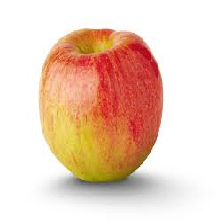

In [231]:
print("Apple Braeburn")
apple = load_img("Fruit360/fruits-360_dataset/fruits-360/Test/Apple Braeburn/1.jpg", target_size=(224,224))
apple

In [232]:
apple1= img_to_array(apple)
apple1 = apple1/255
apple1 = apple1.reshape(1,224,224,3)
apple1.shape




(1, 224, 224, 3)

In [233]:
p1 = modeltt.predict(apple1).argmax()

print(p1, calories[p1])

1/1 [==============================] - 0s 17ms/step
55 Kaki:~81 calories per 100 grams
